<a href="https://colab.research.google.com/github/manjushree7/AI-ML/blob/main/2331414_ManjushreeTamang(Training_CNN_for_Image_Classification_Task)Workshop6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task - 1

In [4]:
!pip install tensorflow

In [2]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [3]:
import tensorflow as tf
print(tf.__version__)

2.18.0


# Task1

In [1]:
#train image data
train_df = "//content/drive/MyDrive/Colab Notebooks/AI and ML/Week5/FruitinAmazon/train"

#test image data
test_df = "/content/drive/MyDrive/Colab Notebooks/AI and ML/Week5/FruitinAmazon/test"

In [5]:
# Get class names (subdirectories)
class_names = sorted(os.listdir(train_df))

if not class_names:
    print("No class directories found in the train folder!")
else:
    print(f"Found {len(class_names)} classes: {class_names}")

Found 6 classes: ['acai', 'cupuacu', 'graviola', 'guarana', 'pupunha', 'tucuma']


In [6]:
from PIL import Image, UnidentifiedImageError
corrupted_images = []  # List to store corrupted image paths

# Loop through each class folder and check for corrupted images
for class_name in class_names:
    class_path = os.path.join(train_df, class_name)
    if os.path.isdir(class_path):  # Ensure it’s a valid directory
        images = os.listdir(class_path)
        for img_name in images:
            img_path = os.path.join(class_path, img_name)
            try:
                with Image.open(img_path) as img:
                    img.verify()  # Verify image integrity
            except (IOError, UnidentifiedImageError):
                corrupted_images.append(img_path)

# Print results
if corrupted_images:
    print("\nCorrupted Images Found:")
    for img in corrupted_images:
        print(img)
else:
    print("\nNo corrupted images found.")


No corrupted images found.


In [7]:
# Dictionary to store class counts
class_counts = {}

for class_name in class_names:
    class_path = os.path.join(train_df, class_name)
    if os.path.isdir(class_path):
        images = [img for img in os.listdir(class_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]
        class_counts[class_name] = len(images)  # Count images in each class

# Print Class Balance
print("\nClass Distribution:")
print("=" * 45)
print(f"{'Class Name':<25}{'Valid Image Count':>15}")
print("=" * 45)
for class_name, count in class_counts.items():
    print(f"{class_name:<25}{count:>15}")
print("=" * 45)


Class Distribution:
Class Name               Valid Image Count
acai                                  15
cupuacu                               15
graviola                              15
guarana                               15
pupunha                               15
tucuma                                15


In [8]:
selected_images = []  # Store image paths
selected_labels = []  # Store corresponding class names

for class_name in class_names:
    class_path = os.path.join(train_df, class_name)
    if os.path.isdir(class_path):
        images = [img for img in os.listdir(class_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]
        if images:  # Ensure the class folder is not empty
            selected_img = os.path.join(class_path, random.choice(images))
            selected_images.append(selected_img)
            selected_labels.append(class_name)

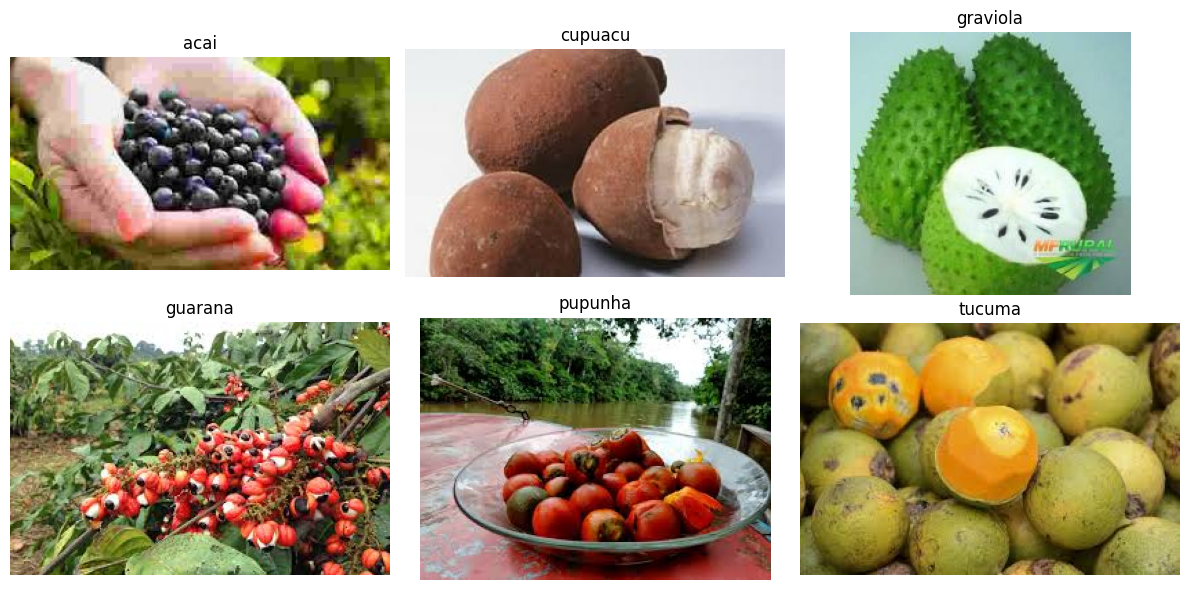

In [9]:
import matplotlib.image as mpimg

# Determine grid size
num_classes = len(selected_images)
cols = (num_classes + 1) // 2  # Determine number of columns
rows = 2  # Fixed number of rows for layout

fig, axes = plt.subplots(rows, cols, figsize=(12, 6))

for i, ax in enumerate(axes.flat):
    if i < num_classes:
        img = mpimg.imread(selected_images[i])
        ax.imshow(img)
        ax.set_title(selected_labels[i])
        ax.axis("off")
    else:
        ax.axis("off")  # Hide unused subplots

plt.tight_layout()
plt.show()

In [10]:
def load_datasets(dataset_path, img_size=(128, 128), batch_size=32):
    train_ds = image_dataset_from_directory(
        dataset_path,
        validation_split=0.2,
        subset="training",
        seed=42,
        image_size=img_size,
        batch_size=batch_size
    )
    val_ds = image_dataset_from_directory(
        dataset_path,
        validation_split=0.2,
        subset="validation",
        seed=42,
        image_size=img_size,
        batch_size=batch_size
    )
    return train_ds, val_ds

train_ds, val_ds = load_datasets(train_df)

Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.


In [11]:
def build_cnn_model(input_shape, num_classes):
    cnn_model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return cnn_model

# Example usage:
input_shape = (128, 128, 3)
class_names = train_ds.class_names
cnn_model = build_cnn_model(input_shape, len(class_names))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
def compile_model(model):
    cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return cnn_model

# Example usage:
cnn_model = compile_model(cnn_model)
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       2,097,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,116,454 (8.07 MB)

 Trainable params: 2,116,454 (8.07 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
def train_model(model, train_ds, val_ds, epochs=250, batch_size=16):
    callbacks = [
        keras.callbacks.ModelCheckpoint("best_model.h5", save_best_only=True),
        keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
    ]
    cnn_model.fit(train_ds, validation_data=val_ds, epochs=epochs, batch_size=batch_size, callbacks=callbacks)
    return cnn_model

# Example usage:
cnn_model = train_model(cnn_model, train_ds, val_ds)

Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step - accuracy: 0.1707 - loss: 235.5234

3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 690ms/step - accuracy: 0.1662 - loss: 259.3100 - val_accuracy: 0.1667 - val_loss: 199.6034
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step - accuracy: 0.1753 - loss: 191.0975

3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 547ms/step - accuracy: 0.1732 - loss: 189.8824 - val_accuracy: 0.2778 - val_loss: 129.3926
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - accuracy: 0.2089 - loss: 113.4154

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 444ms/step - accuracy: 0.2157 - loss: 109.3881 - val_accuracy: 0.3889 - val_loss: 16.4848
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step - accuracy: 0.3565 - loss: 10.3986

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 457ms/step - accuracy: 0.3472 - loss: 10.1513 - val_accuracy: 0.2222 - val_loss: 2.6584
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 539ms/step - accuracy: 0.4155 - loss: 2.0769

3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 772ms/step - accuracy: 0.4123 - loss: 2.0805 - val_accuracy: 0.4444 - val_loss: 2.4604
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 403ms/step - accuracy: 0.5916 - loss: 1.0338 - val_accuracy: 0.3333 - val_loss: 2.8089
Epoch 7/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 406ms/step - accuracy: 0.6636 - loss: 0.6968 - val_accuracy: 0.3889 - val_loss: 3.4841
Epoch 8/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 484ms/step - accuracy: 0.8346 - loss: 0.5761 - val_accuracy: 0.3889 - val_loss: 3.4465
Epoch 9/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 481ms/step - accuracy: 0.9076 - loss: 0.4076 - val_accuracy: 0.5000 - val_loss: 3.3812
Epoch 10/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 719ms/step - accuracy: 0.9714 - loss: 0.2308 - val_accuracy: 0.3889 - val_loss: 3.4953
Epoch 11/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 408ms/step - accuracy: 0.9891 - loss: 0.1378 - val_accuracy: 0.4444 - val_loss: 3.8280
Epoch 12/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 404ms/step - accuracy: 0.9822 - loss: 0.0855 - val_accuracy: 0.4444 - val_loss: 

In [14]:
def evaluate_model(model, test_ds):
    test_loss, test_acc = model.evaluate(test_ds)
    print(f"Test Accuracy: {test_acc:.4f}")
    print(f"Test Loss: {test_loss:.4f}")
    #return test_loss, test_acc

# Example usage:
evaluate_model(cnn_model, val_ds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - accuracy: 0.4444 - loss: 2.4604
Test Accuracy: 0.4444
Test Loss: 2.4604


In [15]:
def save_model(model, filename="model.h5"):
    model.save(filename)

def load_model(filename="model.h5"):
    return keras.models.load_model(filename)

save_model(cnn_model)
cnn_model = load_model()

In [16]:
from sklearn.metrics import classification_report

In [17]:
def make_predictions(model, test_ds, class_names):
    y_true, y_pred = [], []

    for images, labels in test_ds:
        predictions = model.predict(images)
        y_pred.extend(np.argmax(predictions, axis=1))
        y_true.extend(labels.numpy())

    print(classification_report(y_true, y_pred, target_names=class_names))

make_predictions(cnn_model, val_ds, class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
              precision    recall  f1-score   support

        acai       0.50      1.00      0.67         3
     cupuacu       0.40      0.50      0.44         4
    graviola       0.00      0.00      0.00         1
     guarana       0.00      0.00      0.00         3
     pupunha       0.50      0.75      0.60         4
      tucuma       0.00      0.00      0.00         3

    accuracy                           0.44        18
   macro avg       0.23      0.38      0.29        18
weighted avg       0.28      0.44      0.34        18



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [18]:
from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Dropout, BatchNormalization,Activation, Flatten, Dense)
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [19]:
# Define augmentation layers
data_augmentation_layers = [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),  # Added zoom
    layers.RandomContrast(0.1),  # Added contrast
]

# Define augmentation function
def data_augmentation(images):
    for layer in data_augmentation_layers:
        images = layer(images)
    return images

In [20]:
# Build the model
model = Sequential([
    # Data augmentation using Lambda
    layers.Lambda(data_augmentation, input_shape=(128, 128, 3)),  #should match

    # Normalize pixel values to [0, 1]
    layers.Rescaling(1./255),

    # Block 1
    Conv2D(32, (3, 3), padding='same', use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Block 2
    Conv2D(64, (3, 3), padding='same', use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(64, (3, 3), padding='same', use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Block 3
    Conv2D(128, (3, 3), padding='same', use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(128, (3, 3), padding='same', use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Block 4
    Conv2D(256, (3, 3), padding='same', use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Flatten + Dense Layers
    Flatten(),

    Dense(512, use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),

    Dense(256, use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),

    # Output layer - 6 classes for your dataset
    Dense(6, activation='softmax')  # 6 classes, so 6 neurons
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/lambda_layer.py:65: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks
callbacks = [
    ModelCheckpoint("best_model.h5", save_best_only=True),
    EarlyStopping(patience=10, restore_best_weights=True)
]

# Train the model (assuming train_ds and val_ds are already loaded)
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
    callbacks=callbacks
)

# Evaluate
test_loss, test_acc = model.evaluate(val_ds)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Generate classification report
from sklearn.metrics import classification_report
import numpy as np

y_true = []
y_pred = []

for images, labels in val_ds:
    preds = model.predict(images, verbose=0)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(labels.numpy())

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.1800 - loss: 2.2996 

3/3 ━━━━━━━━━━━━━━━━━━━━ 26s 6s/step - accuracy: 0.1801 - loss: 2.3143 - val_accuracy: 0.1667 - val_loss: 1.7875
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.3542 - loss: 1.9773

3/3 ━━━━━━━━━━━━━━━━━━━━ 16s 4s/step - accuracy: 0.3594 - loss: 1.9591 - val_accuracy: 0.1667 - val_loss: 1.7827
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3148 - loss: 1.7958

3/3 ━━━━━━━━━━━━━━━━━━━━ 14s 4s/step - accuracy: 0.3160 - loss: 1.8142 - val_accuracy: 0.1667 - val_loss: 1.7806
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.3906 - loss: 1.4734 - val_accuracy: 0.1667 - val_loss: 1.8234
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 4s/step - accuracy: 0.4319 - loss: 1.3619 - val_accuracy: 0.1667 - val_loss: 1.9398
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 5s/step - accuracy: 0.4961 - loss: 1.1062 - val_accuracy: 0.1667 - val_loss: 2.0769
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.5395 - loss: 1.2004 - val_accuracy: 0.1667 - val_loss: 2.1670
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 4s/step - accuracy: 0.6654 - loss: 0.9432 - val_accuracy: 0.1667 - val_loss: 2.2684
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.5226 - loss: 1.1003 - val_accuracy: 0.1667 - val_loss: 2.4586
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.5551 - loss: 1.0797 - val_accuracy: 0.1667 - val_loss: 2.6423
Epoch 11/50
3/3 ━━

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Task 2

In [22]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Load the VGG16 model pre-trained on ImageNet
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [23]:
# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)  # Added dropout for regularization
x = Dense(512, activation='relu')(x)  # Added another dense layer
x = Dropout(0.5)(x)
predictions = Dense(6, activation='softmax')(x)  # 6 classes

In [24]:
# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model - CHANGED to sparse_categorical_crossentropy
model.compile(optimizer=Adam(learning_rate=0.0001),  # Lower learning rate
             loss='sparse_categorical_crossentropy',  # Changed from categorical
             metrics=['accuracy'])
# Callbacks
callbacks = [
    ModelCheckpoint("best_vgg_model.h5", save_best_only=True),
    EarlyStopping(patience=5, restore_best_weights=True)
]

In [25]:
# Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30,
    callbacks=callbacks
)

# Evaluate
test_loss, test_acc = model.evaluate(val_ds)
print(f"Transfer Learning Model Accuracy: {test_acc:.4f}")
print(f"Transfer Learning Model Loss: {test_loss:.4f}")

# Generate classification report
from sklearn.metrics import classification_report
import numpy as np

y_true = []
y_pred = []

for images, labels in val_ds:
    preds = model.predict(images, verbose=0)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(labels.numpy())

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.0747 - loss: 16.4075

3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 6s/step - accuracy: 0.0768 - loss: 16.3357 - val_accuracy: 0.1667 - val_loss: 4.1791
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.1557 - loss: 13.3778

3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 6s/step - accuracy: 0.1515 - loss: 13.1126 - val_accuracy: 0.2778 - val_loss: 3.7483
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.2199 - loss: 11.8428

3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 7s/step - accuracy: 0.2205 - loss: 11.7155 - val_accuracy: 0.3333 - val_loss: 3.4152
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.2193 - loss: 12.9588

3/3 ━━━━━━━━━━━━━━━━━━━━ 17s 5s/step - accuracy: 0.2235 - loss: 12.7792 - val_accuracy: 0.3889 - val_loss: 3.0035
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.2755 - loss: 9.7942

3/3 ━━━━━━━━━━━━━━━━━━━━ 22s 7s/step - accuracy: 0.2726 - loss: 9.7830 - val_accuracy: 0.4444 - val_loss: 2.7867
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3397 - loss: 8.1323

3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 6s/step - accuracy: 0.3416 - loss: 8.0486 - val_accuracy: 0.3889 - val_loss: 2.7526
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 18s 6s/step - accuracy: 0.3368 - loss: 8.1973 - val_accuracy: 0.4444 - val_loss: 2.7892
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.3565 - loss: 7.0995

3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 7s/step - accuracy: 0.3472 - loss: 7.2916 - val_accuracy: 0.4444 - val_loss: 2.6683
Epoch 9/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3513 - loss: 6.8968

3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 6s/step - accuracy: 0.3433 - loss: 6.9737 - val_accuracy: 0.6111 - val_loss: 2.2564
Epoch 10/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.4757 - loss: 5.1609

3/3 ━━━━━━━━━━━━━━━━━━━━ 18s 5s/step - accuracy: 0.4714 - loss: 5.0896 - val_accuracy: 0.5556 - val_loss: 1.9632
Epoch 11/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.4306 - loss: 6.5861

3/3 ━━━━━━━━━━━━━━━━━━━━ 23s 6s/step - accuracy: 0.4271 - loss: 6.6313 - val_accuracy: 0.5000 - val_loss: 1.7691
Epoch 12/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.5017 - loss: 4.4774

3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 7s/step - accuracy: 0.4909 - loss: 4.6731 - val_accuracy: 0.6111 - val_loss: 1.6284
Epoch 13/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.4647 - loss: 5.5068

3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 5s/step - accuracy: 0.4666 - loss: 5.5192 - val_accuracy: 0.6111 - val_loss: 1.5052
Epoch 14/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3796 - loss: 5.4059

3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 6s/step - accuracy: 0.3819 - loss: 5.3706 - val_accuracy: 0.6111 - val_loss: 1.4462
Epoch 15/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.4936 - loss: 3.9880

3/3 ━━━━━━━━━━━━━━━━━━━━ 22s 7s/step - accuracy: 0.5022 - loss: 3.8774 - val_accuracy: 0.6667 - val_loss: 1.3886
Epoch 16/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5544 - loss: 3.3938

3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 6s/step - accuracy: 0.5582 - loss: 3.3916 - val_accuracy: 0.6667 - val_loss: 1.3679
Epoch 17/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.5660 - loss: 3.8965

3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 7s/step - accuracy: 0.5599 - loss: 3.9953 - val_accuracy: 0.6667 - val_loss: 1.3669
Epoch 18/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 22s 5s/step - accuracy: 0.5022 - loss: 5.1117 - val_accuracy: 0.6667 - val_loss: 1.3743
Epoch 19/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 6s/step - accuracy: 0.5434 - loss: 3.9134 - val_accuracy: 0.6111 - val_loss: 1.4412
Epoch 20/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 7s/step - accuracy: 0.4883 - loss: 3.5513 - val_accuracy: 0.6111 - val_loss: 1.5298
Epoch 21/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 18s 5s/step - accuracy: 0.5924 - loss: 4.0024 - val_accuracy: 0.6111 - val_loss: 1.5451
Epoch 22/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 23s 6s/step - accuracy: 0.5004 - loss: 4.9922 - val_accuracy: 0.6111 - val_loss: 1.5510
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.6667 - loss: 1.3669
Transfer Learning Model Accuracy: 0.6667
Transfer Learning Model Loss: 1.3669

Classification Report:
              precision    recall  f1-score   support

        acai       0.67      0.67  

In [26]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_df,
    image_size=(128, 128),  # Original image size
    batch_size=32,
    validation_split=0.2,
    subset='training',
    seed=42
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    train_df,
    image_size=(128, 128),  # Original image size
    batch_size=32,
    validation_split=0.2,
    subset='validation',
    seed=42
)

class_names = train_ds.class_names
num_classes = len(class_names)

Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.


In [27]:
# 2. Data Augmentation
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1)
])

In [28]:
# 3. Build Transfer Learning Model
inputs = keras.Input(shape=(128, 128, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Resizing(224, 224)(x)  # Resize to VGG16 expected input

In [29]:
# Load VGG16 base model
base_model = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)
base_model.trainable = False  # Freeze base model

x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)

model = keras.Model(inputs, outputs)

In [30]:
# 4. Compile the Model
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_2 (Sequential)            │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_1 (Rescaling)              │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resizing (Resizing)                  │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 6)                   │           3,078 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,980,422 (57.15 MB)

 Trainable params: 265,734 (1.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [31]:
# 5. Train the Model
callbacks = [
    ModelCheckpoint("best_vgg_model.h5", save_best_only=True),
    EarlyStopping(patience=5, restore_best_weights=True)
]

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30,
    callbacks=callbacks
)

Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.2703 - loss: 1.9518 

3/3 ━━━━━━━━━━━━━━━━━━━━ 52s 16s/step - accuracy: 0.2687 - loss: 1.9478 - val_accuracy: 0.2222 - val_loss: 1.8252
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.2153 - loss: 1.9322 

3/3 ━━━━━━━━━━━━━━━━━━━━ 62s 22s/step - accuracy: 0.2135 - loss: 1.9397 - val_accuracy: 0.2222 - val_loss: 1.7997
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.1285 - loss: 2.0295 

3/3 ━━━━━━━━━━━━━━━━━━━━ 81s 22s/step - accuracy: 0.1380 - loss: 2.0199 - val_accuracy: 0.2778 - val_loss: 1.7810
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.1753 - loss: 1.8799 

3/3 ━━━━━━━━━━━━━━━━━━━━ 70s 16s/step - accuracy: 0.1732 - loss: 1.8857 - val_accuracy: 0.2778 - val_loss: 1.7656
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.1939 - loss: 1.9353 

3/3 ━━━━━━━━━━━━━━━━━━━━ 82s 16s/step - accuracy: 0.2010 - loss: 1.9283 - val_accuracy: 0.2222 - val_loss: 1.7575
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.1707 - loss: 1.8135 

3/3 ━━━━━━━━━━━━━━━━━━━━ 83s 17s/step - accuracy: 0.1662 - loss: 1.8225 - val_accuracy: 0.2222 - val_loss: 1.7566
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.3605 - loss: 1.6912 

3/3 ━━━━━━━━━━━━━━━━━━━━ 97s 22s/step - accuracy: 0.3572 - loss: 1.6950 - val_accuracy: 0.2222 - val_loss: 1.7545
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.3212 - loss: 1.6803 

3/3 ━━━━━━━━━━━━━━━━━━━━ 66s 16s/step - accuracy: 0.3138 - loss: 1.6894 - val_accuracy: 0.2222 - val_loss: 1.7511
Epoch 9/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.1898 - loss: 1.8695 

3/3 ━━━━━━━━━━━━━━━━━━━━ 85s 18s/step - accuracy: 0.1910 - loss: 1.8625 - val_accuracy: 0.2222 - val_loss: 1.7478
Epoch 10/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.1354 - loss: 1.8515 

3/3 ━━━━━━━━━━━━━━━━━━━━ 79s 16s/step - accuracy: 0.1328 - loss: 1.8589 - val_accuracy: 0.2778 - val_loss: 1.7474
Epoch 11/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.2211 - loss: 1.8364 

3/3 ━━━━━━━━━━━━━━━━━━━━ 82s 16s/step - accuracy: 0.2144 - loss: 1.8322 - val_accuracy: 0.2778 - val_loss: 1.7451
Epoch 12/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.2205 - loss: 1.8050 

3/3 ━━━━━━━━━━━━━━━━━━━━ 61s 21s/step - accuracy: 0.2174 - loss: 1.8075 - val_accuracy: 0.2778 - val_loss: 1.7404
Epoch 13/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.2078 - loss: 1.7327 

3/3 ━━━━━━━━━━━━━━━━━━━━ 70s 16s/step - accuracy: 0.2218 - loss: 1.7223 - val_accuracy: 0.3333 - val_loss: 1.7344
Epoch 14/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.3351 - loss: 1.6339 

3/3 ━━━━━━━━━━━━━━━━━━━━ 84s 17s/step - accuracy: 0.3346 - loss: 1.6357 - val_accuracy: 0.3333 - val_loss: 1.7297
Epoch 15/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.1707 - loss: 1.7718 

3/3 ━━━━━━━━━━━━━━━━━━━━ 84s 18s/step - accuracy: 0.1662 - loss: 1.7804 - val_accuracy: 0.4444 - val_loss: 1.7228
Epoch 16/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.2407 - loss: 1.7302 

3/3 ━━━━━━━━━━━━━━━━━━━━ 78s 16s/step - accuracy: 0.2361 - loss: 1.7287 - val_accuracy: 0.5000 - val_loss: 1.7132
Epoch 17/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.3247 - loss: 1.6156 

3/3 ━━━━━━━━━━━━━━━━━━━━ 84s 17s/step - accuracy: 0.3268 - loss: 1.6200 - val_accuracy: 0.5556 - val_loss: 1.7029
Epoch 18/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.3356 - loss: 1.6393 

3/3 ━━━━━━━━━━━━━━━━━━━━ 84s 17s/step - accuracy: 0.3316 - loss: 1.6410 - val_accuracy: 0.5556 - val_loss: 1.6943
Epoch 19/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.3403 - loss: 1.6780 

3/3 ━━━━━━━━━━━━━━━━━━━━ 80s 17s/step - accuracy: 0.3385 - loss: 1.6721 - val_accuracy: 0.5556 - val_loss: 1.6892
Epoch 20/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.3657 - loss: 1.6019 

3/3 ━━━━━━━━━━━━━━━━━━━━ 82s 17s/step - accuracy: 0.3611 - loss: 1.6065 - val_accuracy: 0.5556 - val_loss: 1.6871
Epoch 21/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 81s 16s/step - accuracy: 0.3160 - loss: 1.6396 - val_accuracy: 0.5556 - val_loss: 1.6879
Epoch 22/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.3490 - loss: 1.6057 

3/3 ━━━━━━━━━━━━━━━━━━━━ 92s 21s/step - accuracy: 0.3555 - loss: 1.5980 - val_accuracy: 0.5556 - val_loss: 1.6860
Epoch 23/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 82s 21s/step - accuracy: 0.3494 - loss: 1.6872 - val_accuracy: 0.5000 - val_loss: 1.6862
Epoch 24/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.2946 - loss: 1.6605 

3/3 ━━━━━━━━━━━━━━━━━━━━ 72s 16s/step - accuracy: 0.2973 - loss: 1.6591 - val_accuracy: 0.4444 - val_loss: 1.6836
Epoch 25/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.3391 - loss: 1.5521 

3/3 ━━━━━━━━━━━━━━━━━━━━ 92s 21s/step - accuracy: 0.3446 - loss: 1.5549 - val_accuracy: 0.5556 - val_loss: 1.6791
Epoch 26/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.3814 - loss: 1.5062 

3/3 ━━━━━━━━━━━━━━━━━━━━ 73s 17s/step - accuracy: 0.3728 - loss: 1.5133 - val_accuracy: 0.5556 - val_loss: 1.6770
Epoch 27/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 80s 16s/step - accuracy: 0.2943 - loss: 1.5643 - val_accuracy: 0.5000 - val_loss: 1.6774
Epoch 28/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.3640 - loss: 1.6266 

3/3 ━━━━━━━━━━━━━━━━━━━━ 92s 21s/step - accuracy: 0.3702 - loss: 1.6186 - val_accuracy: 0.5000 - val_loss: 1.6759
Epoch 29/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.3455 - loss: 1.6153 

3/3 ━━━━━━━━━━━━━━━━━━━━ 84s 21s/step - accuracy: 0.3424 - loss: 1.6155 - val_accuracy: 0.5000 - val_loss: 1.6742
Epoch 30/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.3194 - loss: 1.6050 

3/3 ━━━━━━━━━━━━━━━━━━━━ 70s 16s/step - accuracy: 0.3229 - loss: 1.6031 - val_accuracy: 0.5000 - val_loss: 1.6709


In [32]:
# 6. Evaluate the Model
test_loss, test_acc = model.evaluate(val_ds)
print(f"\nTransfer Learning Model Accuracy: {test_acc:.4f}")
print(f"Transfer Learning Model Loss: {test_loss:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - accuracy: 0.5000 - loss: 1.6709

Transfer Learning Model Accuracy: 0.5000
Transfer Learning Model Loss: 1.6709


In [33]:
# 7. Generate Classification Report
y_true = []
y_pred = []

for images, labels in val_ds:
    preds = model.predict(images, verbose=0)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(labels.numpy())

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))


Classification Report:
              precision    recall  f1-score   support

        acai       1.00      0.33      0.50         3
     cupuacu       0.60      0.75      0.67         4
    graviola       0.17      1.00      0.29         1
     guarana       1.00      0.67      0.80         3
     pupunha       0.00      0.00      0.00         4
      tucuma       0.50      0.67      0.57         3

    accuracy                           0.50        18
   macro avg       0.54      0.57      0.47        18
weighted avg       0.56      0.50      0.48        18



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
